In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Metropolis Hastings Algorithm (MCMC)

Here we implement and test this MCMC algorithm on the Zipf dataset

In [2]:
class Zipf:
    def __init__(self,M,N,a,x0,K):
        self.M,self.N,self.a,self.x0,self.K = M,N,a,x0,K
        self.states = np.arange(1,M+1)
        self.B = np.ones((M,M))/M
        self.s = np.array([float(i)**-self.a for i in self.states])
        self.s /= sum(self.s)
    
    def sample(self):
        it = 0
        i = self.x0
        tracking = [self.x0]
        while it < self.N:
            j = np.random.choice(self.states,p=self.B[i-1])
            aij = min([1,self.s[j-1]*self.B[j-1,i-1]/(self.s[i-1]*self.B[i-1,j-1])])
            d = np.random.random()
            if d <= aij:
                i=j
            tracking.append(i)
            it+=1
        return tracking

In [3]:
z = Zipf(10,10**5,2,1,0)
t = z.sample()

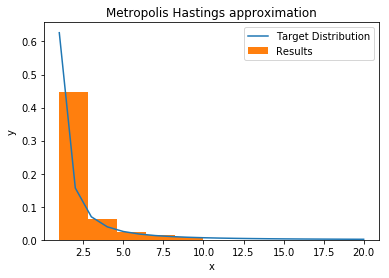

In [4]:
d=np.array([i**-2 for i in range(1,21)])
tot = sum(d)
target = d/tot
plt.plot(range(1,21),target,label="Target Distribution")
plt.hist(t,density=True,label="Results",bins=5)
plt.title('Metropolis Hastings approximation')
plt.xlabel("x")
plt.legend(loc=0)
plt.ylabel("y")
plt.show()